## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [4]:
df = pd.read_csv('aptos.csv')
df.head(15)

metros  valor  quartos  vagas  reformado          bairro
0      107    560        3      2          0  Vila Lusitania
1      107    555        3      2          1  Vila Lusitania
2       49    196        2      1          0    Ferrazopolis
3      104    515        3      2          1          Centro
4       92    560        3      2          1  Vila Lusitania
5       51    249        2      1          0          Taboao
6      140    635        4      3          1          Centro
7       50    210        2      1          1        Demarchi
8       93    450        3      2          0     Baeta Neves
9      107    425        3      2          1     Rudge Ramos
10     100    422        3      2          1     Baeta Neves
11      64    250        2      1          1       Pauliceia
12      65    350        2      2          1          Centro
13      71    303        3      1          0          Centro
14      64    294        3      1          0        Planalto

In [5]:
#código para transformar os bairros em valores numéricos
from sklearn import preprocessing

transformador = preprocessing.LabelEncoder()
df['bairro']= transformador.fit_transform(df['bairro'])
df.head(15)

metros  valor  quartos  vagas  reformado  bairro
0      107    560        3      2          0      16
1      107    555        3      2          1      16
2       49    196        2      1          0       4
3      104    515        3      2          1       2
4       92    560        3      2          1      16
5       51    249        2      1          0      15
6      140    635        4      3          1       2
7       50    210        2      1          1       3
8       93    450        3      2          0       1
9      107    425        3      2          1      13
10     100    422        3      2          1       1
11      64    250        2      1          1      10
12      65    350        2      2          1       2
13      71    303        3      1          0       2
14      64    294        3      1          0      12

### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-   Metros: Tamanho em metros quadrados da área dos apto
-   Valor: Preço de compra em milhar (variável alvo)
-   Quartos: Número de quartos dos aptos
-   Vagas: Número de vagas de veículos no estacionamento
-   Reformado: Valores de 0 e 1, sendo 0 para nunca foi reformado e 1 para foi reformado
-   Bairro: Bairro em que o apto se encontra (um dado categórico que transformamos em contínuo)

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  O valor dos apartamento varia em conta do número de vagas, número de quartos e metros. No geral quanto maior os valores desses campos maior é o preço do imóvel. Ex.: Um apartamento com 4 quartos geralmente vale mais do que um com 2 quartos.
2.  O bairro ser um bairro nobre ou pobre também influencia no preço. Esse é mais difícil de se perceber já que é  uma string e não um inteiro. Mas é inegavelmente responsável por uma  parte do valor do imóvel. Um apartamento com 4 quartos em uma 'zona nobre' (geralmente perto do centro ou em áreas com uma boa infraestrutura e próximo de comércios) vale mais do que um apartamento com 4 quartos em um bairro mais periférico e isolado.
3.  Entre os atributos, provavelmente o que menos interfere no valor é o atributo reformado. Por ser um valor mais abrangente ele nem sempre vai aumentar o preço do apartamento. Ex.:Uma apartamento novo nunca passou por uma reforma mas justamente por ser novo geralmente tem um preço mais elevado do que apartamentos velhos, mas uma apartamento velho que foi reformada geralmente vale mais do que uma apartamento que não foi reformado. No entanto é difícil perceber essa relação já que nosso csv não tem informações sobre a idade dos apartementos ou a quanto tempo essa reforma foi feita e o atributo 'reformado' consiste basicamente em um 'pseudo-boolean' usando dados númericos de 0 e 1, o que dificulta a interpretação desses dados.

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

In [6]:
df.describe()

#aqui temos algumas informações sobre como os dados estão distribuídos no df



metros      valor     quartos       vagas   reformado      bairro
count  100.000000  100.00000  100.000000  100.000000  100.000000  100.000000
mean    80.280000  402.93000    2.590000    1.650000    0.540000    5.570000
std     27.606206  171.43154    0.552222    0.687184    0.500908    5.455523
min     43.000000  188.00000    2.000000    0.000000    0.000000    0.000000
25%     56.750000  258.00000    2.000000    1.000000    0.000000    2.000000
50%     72.000000  355.00000    3.000000    2.000000    1.000000    2.000000
75%    100.000000  515.00000    3.000000    2.000000    1.000000   11.250000
max    199.000000  880.00000    4.000000    4.000000    1.000000   16.000000

In [7]:
df.dtypes

#infromações sobre os tipos de dados
#CUIDADO! O bairro está constando como int pq eu fiz a transformação com o labelencoder, originalmente ele é um object

metros       int64
valor        int64
quartos      int64
vagas        int64
reformado    int64
bairro       int64
dtype: object

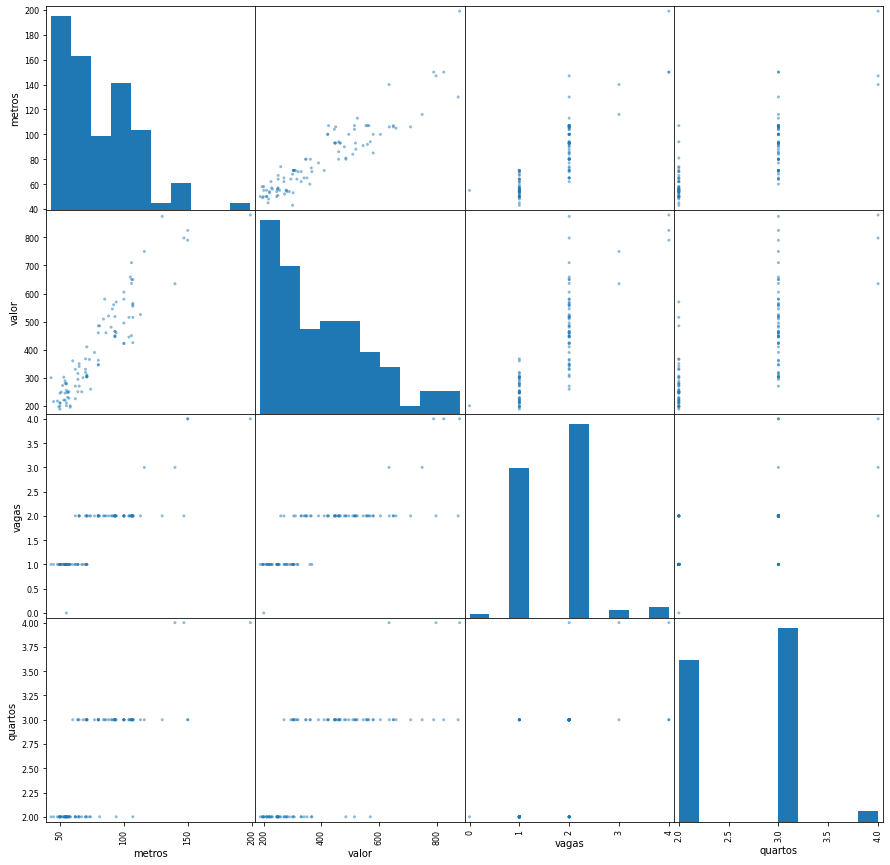

In [19]:
from pandas.plotting import scatter_matrix

df2= df[['metros',	'valor', 'vagas', 'quartos']]
scatter_matrix(df2,figsize=(15, 15))
plt.show()

#Aqui podemos ver como o preço aumenta em relação ao número de vagas, de quartos e de metros como disse anteriormente na resposta 1
#Isso pode ser percebido ao ver a linha de 'valor' e observar uma distribuição parecida com uma reta na diagonal para cima

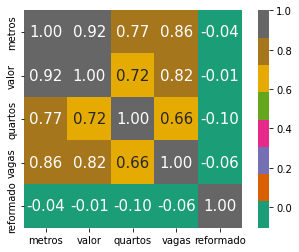

In [9]:
cols = ['metros',	'valor',	'quartos',	'vagas', 'reformado']
corr_matx = df[cols].corr()
heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

#esse gráfico mostra a relação entre os valores, a influência dos valores fica bem clara quando analizamos a 
#linha do valor e comprova o que eu disse anteriormente sobre as reformas na resposta 3 e sobre a afirmação da resposta 1

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

Resposta: Sim, abaixo eu criei gráficos boxplot, podemos ver os outliers representados por um losango no boxplot de metros e de vagas. Os outliers foram mantidos.

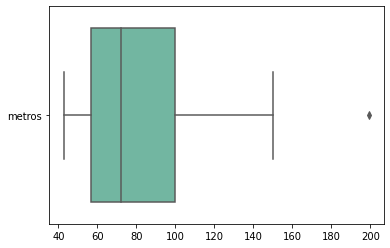

In [24]:
df_outliers_1= df[['metros']]
ax = sns.boxplot(data=df_outliers_1, orient="h", palette="Set2")

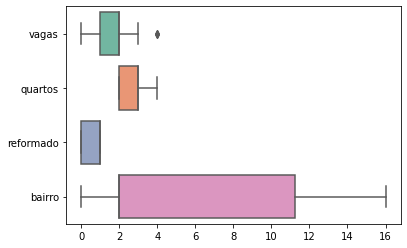

In [26]:
df_outliers_2= df[['vagas', 'quartos', 'reformado', 'bairro']]
ax = sns.boxplot(data=df_outliers_2, orient="h", palette="Set2")

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

-   Nós temos uma base de dados, a nossa inteligencia artificial usará uma parte desses dados para aprender a descobrir o valor dos aptos quando passarmos valores que não foram treinados ainda. Estamos tentamos prever uma variável dependente a partir de uma lista de variáveis independentes.

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

-   Nós temos entradas de diversos valores com o objetivo de descobrir um outro valor numérico, logo a regressão é a melhor opção, já que o algoritmol é treinado para prever uma saída a partir de uma faixa contínua de valores possíveis.

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo de Regressão Linear
2. algoritimo de Árvore de Decisão

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. algoritimo de Regressão Linear: A IA pega diversos dados e tenta achar uma linha que melhor defina esses dados. Dessa forma quando passamos novos dados, ela consegue descobrir com base nessa linha como os dados se comportam de uma forma geral e qual o valor esperado deles.

2. algoritimo de Árvore de decisão: A IA cria diversas árvores de decisão que funcionam como um fluxograma sendo que em cada ramificação dessa árvore ela faz uma verificação, dessa forma ela tenta encontrar qual é a relação entre os valores que ela recebe fazendo diversas ramificações até se assemelhar a uma "árvore", por isso o nome árvore de decisão. Ao final do treinamento o IA entende a relação entre os dados que ela recebeu, quando passamos dados que não foram treinados ela tenta descobrir o que queremos com base nessas relações.

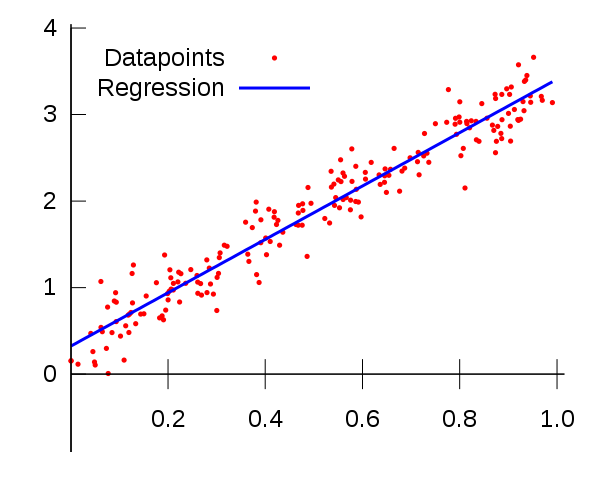

imagem ilustrando uma regressão linear

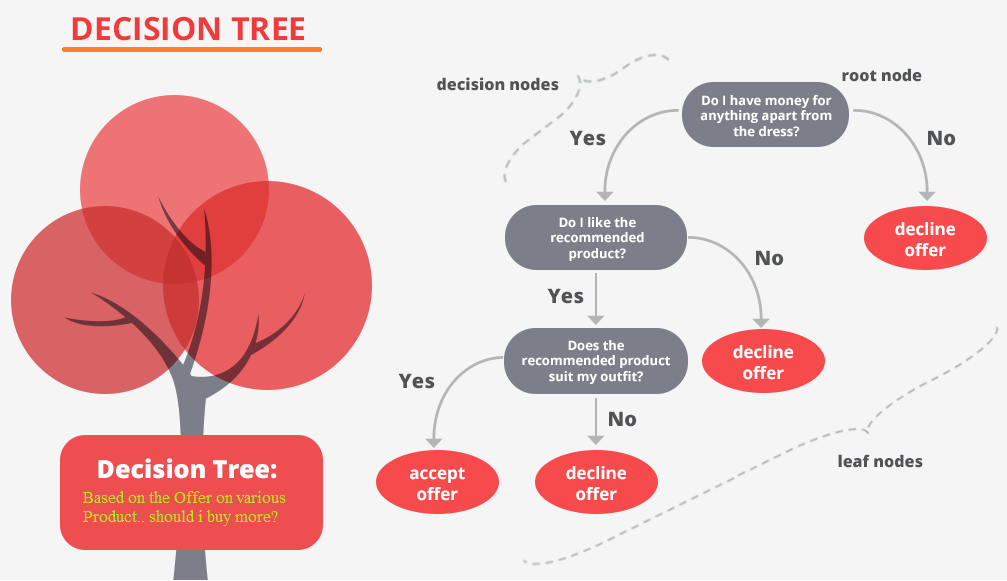

imagem ilustrando uma arvore de decisão

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [35]:
# testes
X = df[['metros',	'quartos',	'vagas', 'reformado', 'bairro']]

# objetivo
y = df['valor']

#embaralha
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)


Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [36]:
#Seu Código aqui...

#regressao linear

# Importa a biblioteca
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cria o modelo de regressão
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(X_train, y_train)

#Pega a precisão
y_train_predito = lin_model.predict(X_train)
y_test_predito = lin_model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_test_predito - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, y_test_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, y_test_predito))
print("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y_test, y_test_predito)))
print("R2-score do treino: %.2f" % r2_score(y_train_predito , y_train) )
print("R2-score: %.2f" % r2_score(y_test_predito , y_test) )



Soma dos Erros ao Quadrado (SSE): 80781 
Erro Quadrático Médio (MSE): 4039.07
Erro Médio Absoluto (MAE): 47.03
Raiz do Erro Quadrático Médio (RMSE): 63.55 
R2-score do treino: 0.83
R2-score: 0.80


### Algoritmo 2

In [38]:
#Seu Código aqui...

#arvore de decisao

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

#Pega a precisão
y_train_predito = regressor.predict(X_train)
y_test_predito = regressor.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_test_predito - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, y_test_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, y_test_predito))
print("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y_test, y_test_predito)))
print("R2-score do treino: %.2f" % r2_score(y_train_predito , y_train) )
print("R2-score do teste: %.2f" % r2_score(y_test_predito , y_test) )



Soma dos Erros ao Quadrado (SSE): 56647 
Erro Quadrático Médio (MSE): 2832.35
Erro Médio Absoluto (MAE): 41.44
Raiz do Erro Quadrático Médio (RMSE): 53.22 
R2-score do treino: 1.00
R2-score do teste: 0.91


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | 0.83 | 1.00 |
| teste  | 0.80 | 0.91 |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** O algorítimo de árvore de decisão, ele obteve um R2 score mais alto que a regressão linear assim como números de erro como o SSE menores, sendo assim ele foi mais acurado.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [17]:
data = {
  "metros": [65],
  "quartos": [2],
  "vagas": [2],
  "reformado": [1],
  "bairro": [2]
}

# Carrega o dataframe
df3 = pd.DataFrame(data)
X = df3[['metros',	'quartos',	'vagas', 'reformado', 'bairro']]

#Pega o valor
valor_predito = int(lin_model.predict(X))



print(f'Valor do apartamento segundo a regresão linear: {valor_predito:,.0f}.000')


Valor do apartamento segundo a regresão linear: 338.000


In [18]:
# Carrega o dataframe
df3 = pd.DataFrame(data)
X = df3[['metros',	'quartos',	'vagas', 'reformado', 'bairro']]

#Pega o valor
valor_predito = int(regressor.predict(X))

print(f'Valor do apartamento segundo a árvore de decisão: {valor_predito:,.0f}.000')

Valor do apartamento segundo a árvore de decisão: 350.000


## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Sim, ele atingiu um R2 score bem alto ficando relativamente próximo de 1 e com números de erros não tão altos. Não só isso mas os dois algoritmos informaram valores relativamente próximos (338 e 350) o que é bom, indica que muito provavelmente o imóvel realmente teria um preço próximo dessa faixa.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Provavelmente criar um laço para descobrir um random state ideal para cada algorítimo além de 'melhorar' a regressão linear para uma regressão polinominal, o que provavelmente aumentaria sua pontuação. Também seria interessante explorar outros algoritmos de regressão para ver qual seria o melhor para resolver o problema que temos e pesquisar um pouco mais a fundo sobre como funciona tratamento de dados e como/se poderia beneficiar o resultado dos nossos algoritmos.




